In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import sklearn as sl
import flask

In [48]:
df = pd.read_csv("predictive_maintenance.csv")
print(df.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine_failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [50]:
df.info()
df.describe()
df['Machine_failure'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine_failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

Machine_failure
0    9661
1     339
Name: count, dtype: int64

In [52]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [54]:
df.isnull().sum()


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine_failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [58]:
print(df.columns)


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


In [64]:
features = df[['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Rotational speed [rpm]']]
labels = df['Machine_failure']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.973
[[1925   14]
 [  40   21]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.60      0.34      0.44        61

    accuracy                           0.97      2000
   macro avg       0.79      0.67      0.71      2000
weighted avg       0.97      0.97      0.97      2000



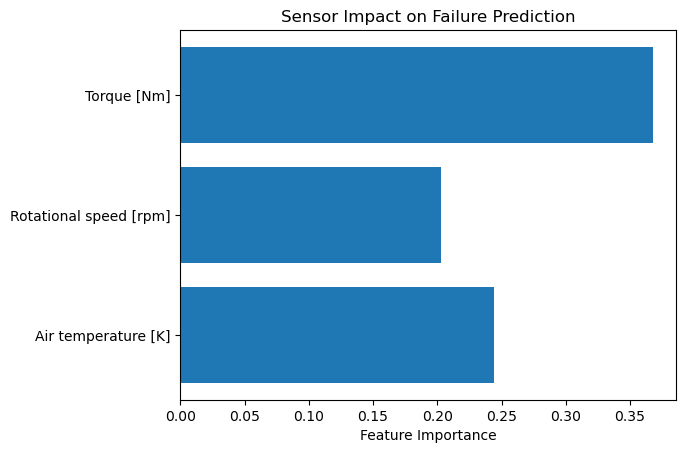

In [74]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = ['Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Rotational speed [rpm]']
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Sensor Impact on Failure Prediction")
plt.show()


In [80]:
import random
sample_input = [[random.uniform(30, 100), random.uniform(10, 50), random.uniform(0.1, 1.5), random.uniform(500, 3000)]]
sample_input_scaled = scaler.transform(sample_input)

result = model.predict(sample_input_scaled)
print("🔧 Maintenance Needed!" if result[0] == 1 else "✅ All Good")


🔧 Maintenance Needed!


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
